# **Decision Trees**:

A decision tree builds a **tree** that splits the data s.t. we have the best separation of our classes. Decision trees serve as the basis model for **random forests**.


Consider the example:

We want to **predict** if a person is **walking or taking the bus** to work.

We have 10 observations (samples) of 2 features, along with a class **label (Yes or No)**:


$\begin{pmatrix} \text{Rain} & \text{Time} & \text{Walk} \\
1 & 30 & \text{No} \\
1 & 15 & \text{No} \\
1 & 5 & \text{No} \\
0 & 10 & \text{No} \\
0 & 5 & \text{No} \\
0 & 15 & \text{Yes} \\
0 & 20 & \text{Yes} \\
0 & 25 & \text{Yes} \\
0 & 30 & \text{Yes} \\
0 & 30 & \text{Yes} \\
 \end{pmatrix}$

Now we want to build a tree that splits the data.

We put all the samples in the **root node** and apply a **question**:
* Is it raining, i.e. Rain = 1?
  * If yes - put the samples where answer is yes in the right node = 3 of them.
  * Otherwise, put the other samples (7 of them) to the left node.

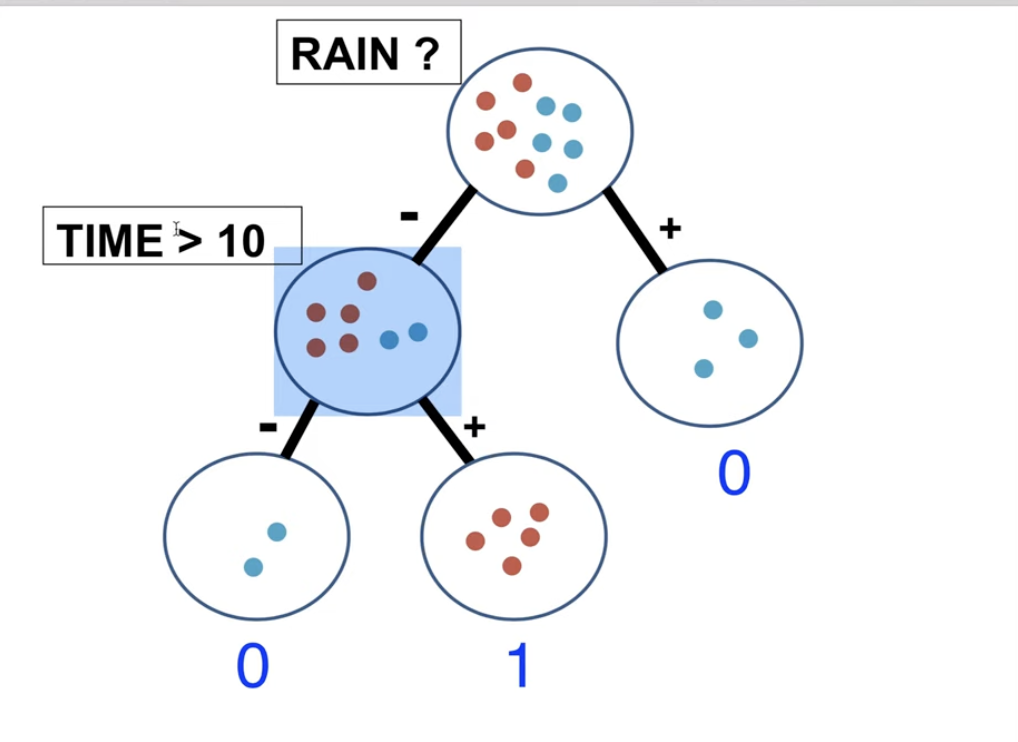

* On the right, from the first node we can immediately say that the label is **No** (return the class label as 0) for the samples where the **Rain = 1**.

On the left side, we can further split the data and grow the tree.

* We ask the next question: do they have more than 10 minutes, i.e. **Time $>$ 10**?
  * If yes - the right node gets samples where the person has more than 10 minutes.
  * Otherwise, the left node gets samples that have less than 10 minutes.


Here, we also can say that the labels are 0 on the left, 1 on the right.

We now ask if we should build more nodes or stop. Note that on the second level, if we stop, we can return the most common label on the left, i.e. 5 points vs 2, meaning we predict that it is more likely that the person will walk. However, we choose to further split our data.

* **However**, we don't want to grow the tree too large because that way we are more likely to **overfit** the data.
* **But**, we still want to have a good predicition.

Hence, there is a tradeoff between tree depth and overfitting vs prediction accuracy - the deeper the tree, the higher the accuracy may be, but the model itself become more prone to overfitting.

## **Now, we must determine at which node to apply (ask) which question?**

In the example, we first ask if it's raining, on the second level we ask how much time there is. Why not the other way around? Or why not ask if they have more than 5? 20 minutes?

* In our example, we have the so-called **best split feature** and the **best-split value (or threshold)** that the model seeks to find. The point is that at each node, the model seeks to find the best split feature and the best split threshold, and store them - this is the **training phase**.

Later, when we perform prediction on new testing samples, we start at the root and traverse down the tree, applying the questions that we stored, travel left or right, until we reach a leaf node, and then apply the most common label based on our test samples.

## How to find the best split?

### Entropy:
To find the best split, we find the **entropy** - the measure of **uncertainty**:

* $ E = - \sum P(X) \cdot \log_2(P(X))$

where
* $P(X) = \frac{\#x}{n}$ is the number of occurences of $x$ over the total number of samples $n$.

Looks a whole lot like the negative expectation of $\log(P(X))$.

### Example:
In our example, the labels are:
`[0,0,0,0,0,1,1,1,1,1]`

Thus,

$ E = - \frac{5}{10} \cdot \log_2 \left( \frac{5}{10} \right) - \frac{5}{10} \cdot \log_2 \left(\frac{5}{10} \right) = $

$ -0.5 \log_2(0.5) - 0.5\log_2(0.5)=$

$ -0.5(-1) - 0.5 (-1) = 0.5 + 0.5 = 1 $ - this is the **worst possible case**.

For example, in the 1st node, we can't make a prediction of the class (0 or 1) based on the current split because we have an equal amount of samples of both classes.

On the right side of the 2nd level of the tree, the node has entropy of 0 - it contains only samples of the same class.

We calculate entropy and split the data, again calculating the entropy for the child nodes, and then calculate how much information we **gain** from each split.

The goal is to minimize the entropy in each subset of data as much as possible, thus creating more homogeneous groups (i.e., groups where most examples belong to the same class).


### Information Gain:

Parent to Child **Information Gain** is calculated as the entropy of the parent minus the weighted average of the entropies of the children:

* $IG = E(parent) - [\text{weighted average} \cdot E(children)]$


### Example,
In our example tree, we have the root node $S = $ `[0,0,0,0,0,1,1,1,1,1]`, and the children nodes: $S_1 = $ `[0,0,1,1,1,1,1]`,  $S_2 = $ `[0,0,0]`. Thus:

$IG = E(S) - \left[\frac{7}{10} \cdot E(S_1) + \frac{3}{10} \cdot E(S_2)\right]$

$IG = 1 - \left[\frac{7}{10} \cdot 0.863 + \frac{3}{10} \cdot 0\right] = 0.395 $

We do a **greedy search**, going over all possible feature splits and thresholds, e.g. Rain (0 or 1), Time(> 5,10,15,20...), then we choose and store the best features and thresholds.

# Algorithm Outline: *Decision Tree*
## Training - Building the Tree:
1. Start at the top node and at each subsequent child node select the best split based on the best information gain.
2. Greedy Search: loop over all features and over all thresholds (all possible feature values)
3. Save the best split feature and split threshold at each node.
4. Build the tree recursively.
5. Apply some stopping criteria to stop growing, e.g. here: **maximum depth, minimum samples at node, no more class distribution in node**.
6. When we have a leaf node, store the most common class label of this node.

## Predicting - Traversing the Tree:
1. Traverse the tree recursively.
2. At each node, look at the best split feature of the test feature vector $x$ and go left or right, depending on `x[feature_idx] <= threshold`
3. When we reach the leaf node, return the stored most common class label.

# Implementation

In [15]:
import numpy as np
from collections import Counter

# entropy method:

def entropy(y): # vector y of all class labels

  hist = np.bincount(y) # find number of occurences of all class labels
  ps = hist/len(y) # probabilities
  return -np.sum([p * np.log2(p) for p in ps if p >0])


# helper Node class, stores node info

class Node:
    # want to store best split feature/threshold, along with left/right child nodes/trees/labels
    def __init__(self, feature = None, threshold = None, left = None, right = None, *, value = None): # use value param as a keyword only param
    # later when we create a leaf node that only gets a value, we only assign it an actual value and store

      self.feature = feature
      self.threshold = threshold
      self.left = left
      self.right = right
      self.value = value

    def is_leaf_node(self):
      return self.value is not None



class DecisionTree:
  # init method params:
    # stopping criteria:
    # --min_samples_split: min samples required to further split our tree
    # --max_depth: max depth of the tree
  # n_feats: number of features = None, can still specify it =>
  # => we do a greedy search over all features, but we can also specify to go over only a number of features, randomly select the subset
  # hence the aspect of RANDOMNESS -> RANDOM TREES can be extended into a RANDOM FOREST

  def __init__(self, min_samples_split = 2, max_depth = 100, n_feats = None):
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.n_feats = n_feats
    # create a root:
    self.root = None # need to know where it is, where to start tree traversal

  # fit method, gets training data/labels, grows the tree

  def fit(self, X, y):
    # safety check:
    self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])# if n_feats is not specified, otherwise take the min number of features
    # grow tree
    self.root = self._grow_tree(X,y)

  # helper grow tree method

  def _grow_tree(self, X, y, depth = 0):
    n_samples, n_features = X.shape
    n_labels = len(np.unique(y))

    # stopping criteria
    if (depth >= self.max_depth
        or n_labels == 1
        or n_samples < self.min_samples_split):
      leaf_value = self._most_common_label(y)
      return Node(value = leaf_value)

    # select feature indices:
    feature_idx = np.random.choice(n_features, self.n_feats, replace = False) # select random number 0 - n_features, don't replace the same indices multiple times

    # greedy search:
    best_feat, best_thresh = self._best_criteria(X,y, feature_idx)
    # split our tree with the best_feat, best_tresh

    left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)

    # continue growing:
    left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1) # only grow from left indices
    right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
    # return new node in the middle:
    return Node(best_feat, best_thresh, left, right)

  # best criteria method:
  def _best_criteria(self, X, y, feat_idxs):
    best_gain = -1
    split_idx, split_threshold = None, None

    for feat_idx in feat_idxs:
      # choose only the col vector of X:
      X_columns = X[:, feat_idx] # all samples at the column index
      thresholds = np.unique(X_columns) # go over all possible thresholds
      for threshold in thresholds:
        gain = self._information_gain(y, X_columns, threshold)
        if gain > best_gain:
          best_gain = gain
          # best split idx is the current feature idx
          split_idx = feat_idx
          split_thresh = threshold

    return split_idx, split_thresh


  def _information_gain(self, y, X_columns, split_thresh):

    # parent E
    parent_entropy = entropy(y)

    # generate split
    left_idxs, right_idxs = self._split(X_columns, split_thresh)

    if len(left_idxs) == 0 or len(right_idxs) == 0:
      return 0 # info gain
    # else, compute the entropy for each

    n = len(y)
    n_l, n_r = len(left_idxs), len(right_idxs)
    e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])

    # weighted avg child E
    child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

    # return ig
    ig = parent_entropy - child_entropy
    return ig


  def _split(self, X_columns, split_thresh):
    # apply the question:
    left_idxs = np.argwhere(X_columns <= split_thresh).flatten() # 1D vector needed, hence we flatten
    right_idxs = np.argwhere(X_columns > split_thresh).flatten()
    return left_idxs, right_idxs



  def predict(self, X):
    # traverse the tree:
    return np.array([self._traverse_tree(x, self.root) for x in X])

  def _traverse_tree(self, x, node): # gets one sample
    # recursive function
    # check if leaf node:
    if node.is_leaf_node():
      return node.value

    if x[node.feature] <= node.threshold:
      return self._traverse_tree(x, node.left)
    else:
      return self._traverse_tree(x, node.right)

  def _most_common_label(self, y):
    counter = Counter(y) # count the number of occurences of all the y's
    most_common = counter.most_common(1)[0][0] # most common label, turning list of tuples - 1st element of the list, (value stored, label)
    return most_common

In [16]:
# testing:
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy


data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

classifier = DecisionTree(max_depth= 10)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9385964912280702
